In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt 

In [37]:
df=pd.read_csv("bank_data.csv")
df.head()
print(df.columns)

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [38]:
df.shape

(6819, 96)

In [39]:
label=df['Bankrupt?']
print(label)
label.value_counts()

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64


0    6599
1     220
Name: Bankrupt?, dtype: int64

In [40]:
data=df.drop(['Bankrupt?'], axis = 1)
print(data)

       ROA(C) before interest and depreciation before interest  \
0                                              0.370594          
1                                              0.464291          
2                                              0.426071          
3                                              0.399844          
4                                              0.465022          
...                                                 ...          
6814                                           0.493687          
6815                                           0.475162          
6816                                           0.472725          
6817                                           0.506264          
6818                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3          

## Analyzing using PCA

In [41]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score 
Transf_pca = PCA(n_components= 10)
datanew = Transf_pca.fit_transform(data)
print(datanew)
datanew.shape

[[ 2.16532981e+09 -3.81494889e+07 -3.23761461e+09 ... -3.34204758e+09
  -6.72487040e+07 -6.17697844e+07]
 [ 4.90236601e+08  8.46379452e+09  8.74609954e+08 ... -2.33057528e+09
   3.30543714e+07 -7.74276757e+07]
 [-2.62013847e+09 -2.16996639e+09 -1.23941619e+09 ... -4.58462699e+08
  -2.73737188e+08 -8.12374249e+07]
 ...
 [-2.62966345e+09 -2.70482399e+09 -1.45136980e+09 ... -5.23569752e+08
  -1.05510733e+08 -5.63597281e+07]
 [-3.93145611e+09  1.16235646e+09  5.16590205e+08 ...  5.59121103e+08
   1.57067794e+08  3.11636271e+09]
 [-2.50663412e+09 -2.09832184e+09 -6.90906267e+08 ... -4.64482610e+08
  -9.93616716e+07 -6.83399010e+07]]


(6819, 10)

In [42]:
label = pd.DataFrame(label)
label.shape
newbase = np.concatenate((datanew, label), axis = 1)
print(newbase)
newbase.shape
newbase=pd.DataFrame(newbase)
print(newbase.columns)


[[ 2.16532981e+09 -3.81494889e+07 -3.23761461e+09 ... -6.72487040e+07
  -6.17697844e+07  1.00000000e+00]
 [ 4.90236601e+08  8.46379452e+09  8.74609954e+08 ...  3.30543714e+07
  -7.74276757e+07  1.00000000e+00]
 [-2.62013847e+09 -2.16996639e+09 -1.23941619e+09 ... -2.73737188e+08
  -8.12374249e+07  1.00000000e+00]
 ...
 [-2.62966345e+09 -2.70482399e+09 -1.45136980e+09 ... -1.05510733e+08
  -5.63597281e+07  0.00000000e+00]
 [-3.93145611e+09  1.16235646e+09  5.16590205e+08 ...  1.57067794e+08
   3.11636271e+09  0.00000000e+00]
 [-2.50663412e+09 -2.09832184e+09 -6.90906267e+08 ... -9.93616716e+07
  -6.83399010e+07  0.00000000e+00]]
RangeIndex(start=0, stop=11, step=1)


In [43]:
dataset_selected1=newbase.loc[newbase[10].isin([1])]
dataset_selected0=newbase.loc[newbase[10].isin([0])]

label1=dataset_selected1[10]
data1=dataset_selected1.drop([10], axis=1)

label0=dataset_selected0[10]

label0=label0-1
data0=dataset_selected0.drop([10], axis=1)

In [44]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1=train_test_split(data1, label1, test_size=0.33, random_state=0)
from sklearn import svm
model=svm.OneClassSVM(kernel='rbf', nu=1, gamma=0.00001)
import time
debut=time.time()
model.fit(x_train1)
fin=time.time()-debut

In [45]:
import numpy as np
data_tesst=np.concatenate((x_test1, data0), axis=0)
label_tesst=np.concatenate((y_test1,label0),axis=0)
pred=model.predict(data_tesst)

In [46]:
from sklearn.metrics import accuracy_score 
ACC=accuracy_score(label_tesst, pred)*100
print('accuracy =')
print(ACC)

accuracy =
98.9058752997602


In [47]:
from sklearn.metrics import classification_report
print(classification_report(label_tesst,pred))

              precision    recall  f1-score   support

        -1.0       0.99      1.00      0.99      6599
         1.0       0.00      0.00      0.00        73

    accuracy                           0.99      6672
   macro avg       0.49      0.50      0.50      6672
weighted avg       0.98      0.99      0.98      6672



C:\Users\svsah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[6599    0]
 [  73    0]]


Text(0.5, 15.0, 'Predicted label')

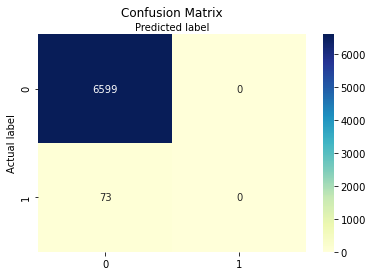

In [48]:
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(label_tesst, pred)
print(CM)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [49]:
print(newbase)
label=newbase[10]
data=newbase.drop([10],axis=1)
label.value_counts()

                 0             1             2             3             4  \
0     2.165330e+09 -3.814949e+07 -3.237615e+09 -2.063212e+09 -1.969494e+09   
1     4.902366e+08  8.463795e+09  8.746100e+08 -3.292132e+09 -1.383796e+09   
2    -2.620138e+09 -2.169966e+09 -1.239416e+09  8.771527e+08 -2.812465e+09   
3     3.249284e+09  5.987899e+09 -2.180465e+09 -4.385660e+09 -2.566962e+09   
4     7.604602e+09 -2.951427e+09  2.267775e+09 -2.370486e+09 -1.647314e+09   
...            ...           ...           ...           ...           ...   
6814 -2.835783e+09 -2.233507e+09 -1.652095e+09  1.622071e+09 -1.970057e+09   
6815 -1.597369e+09  5.539448e+09  6.691095e+09  6.700097e+08  4.564149e+09   
6816 -2.629663e+09 -2.704824e+09 -1.451370e+09 -3.203723e+08 -2.070655e+09   
6817 -3.931456e+09  1.162356e+09  5.165902e+08 -2.674333e+08 -2.380990e+09   
6818 -2.506634e+09 -2.098322e+09 -6.909063e+08  1.826166e+09 -4.451684e+09   

                 5             6             7             8   

0.0    6599
1.0     220
Name: 10, dtype: int64

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
dtree = DecisionTreeClassifier()
x_train,x_test,y_train,y_test = train_test_split(data,label,test_size = 0.3,random_state = 0)
import time
debut=time.time()
dtree.fit(x_train,y_train)
fin=time.time()-debut
prediction = dtree.predict(x_test)



In [68]:
from sklearn.metrics import accuracy_score
ACC=accuracy_score(y_test,prediction)*100
print('With decision tree accuracy is: ',ACC)

With decision tree accuracy is:  97.95454545454545


In [69]:
from sklearn.metrics import classification_report
Class=classification_report(y_test,prediction)
print(Class)

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      1925
         1.0       0.96      1.00      0.98      2035

    accuracy                           0.98      3960
   macro avg       0.98      0.98      0.98      3960
weighted avg       0.98      0.98      0.98      3960



[[1844   81]
 [   0 2035]]


Text(0.5, 15.0, 'Predicted label')

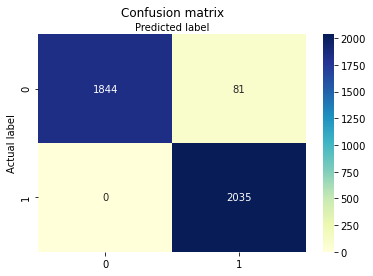

In [70]:
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(y_test,prediction)
print(CM)


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

[0.         0.04207792 1.        ] [0. 1. 1.]
97.89610389610391


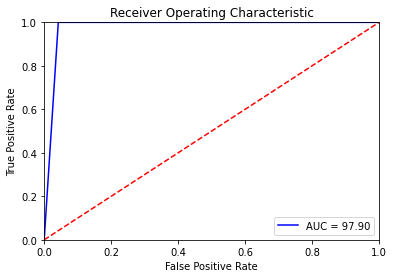

In [71]:
from sklearn.metrics import roc_curve,auc
fp, tp, thresholds=roc_curve(y_test,prediction,pos_label=1)
print(fp, tp)
AUC=auc(fp, tp)*100
print(AUC)


import matplotlib.pyplot as plt
plt.plot(fp, tp, color='blue',label = 'AUC = %0.2f' % AUC)
plt.title('Receiver Operating Characteristic')

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

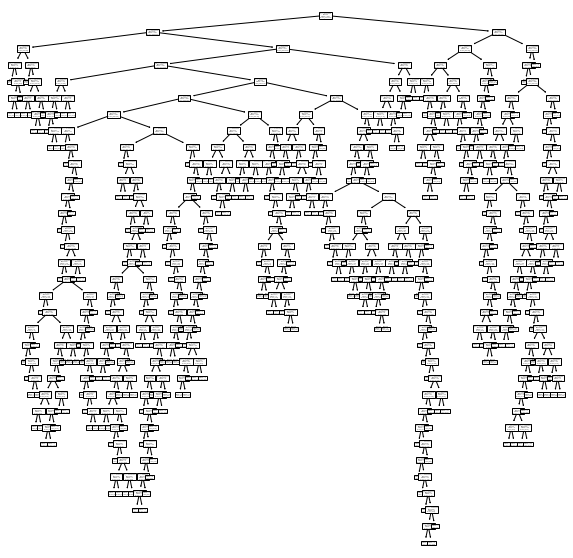

In [72]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(dtree)
plt.show()

In [73]:
from sklearn.metrics import f1_score
f1score=f1_score(y_test,prediction)*100
print('f1_score is: ',f1score) 

f1_score is:  98.04866297277765


In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
rf = RandomForestClassifier(criterion = 'gini')
x_train,x_test,y_train,y_test = train_test_split(data,label,test_size = 0.3,random_state =1)
import time
debut=time.time()
rf.fit(x_train,y_train)
fin=time.time()-debut

prediction = rf.predict(x_test)

<ipython-input-74-909b4c94ef82>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


In [75]:
from sklearn.metrics import accuracy_score
ACC=accuracy_score(y_test,prediction)*100
print('With random forest accuracy is: ',ACC)

With random forest accuracy is:  99.69696969696969


In [76]:
from sklearn.metrics import classification_report
Class=classification_report(y_test,prediction)
print(Class)

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1999
         1.0       0.99      1.00      1.00      1961

    accuracy                           1.00      3960
   macro avg       1.00      1.00      1.00      3960
weighted avg       1.00      1.00      1.00      3960



[[1987   12]
 [   0 1961]]


Text(0.5, 15.0, 'Predicted label')

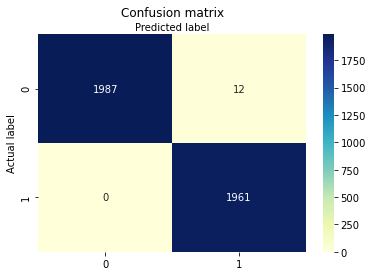

In [77]:
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(y_test,prediction)
print(CM)


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

[0.       0.006003 1.      ] [0. 1. 1.]
99.69984992496248


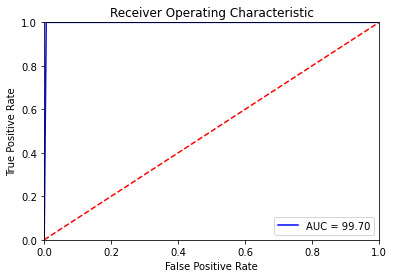

In [78]:
from sklearn.metrics import roc_curve,auc
fp, tp, thresholds=roc_curve(y_test,prediction,pos_label=1)
print(fp, tp)
AUC=auc(fp, tp)*100
print(AUC)


import matplotlib.pyplot as plt
plt.plot(fp, tp, color='blue',label = 'AUC = %0.2f' % AUC)
plt.title('Receiver Operating Characteristic')

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [79]:
from sklearn.metrics import f1_score
f1score=f1_score(y_test,prediction)*100
print('f1_score is: ',f1score) 

f1_score is:  99.69496695475343
